# WEB SITE FISHING

https://www.google.com/url?q=https%3A%2F%2Farchive.ics.uci.edu%2Fdataset%2F379%2Fwebsite%2Bphishing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Preview Dataset:

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data/website_phishing_data.csv")


In [4]:
df.head()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [5]:
df.shape

(1353, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWindow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [7]:
# Generate descriptive analytics for numerical features
df.describe()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



#Data Cleaning

In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
SFH                  0
popUpWindow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64


In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 629


In [10]:
if duplicates > 0:
    # Remove duplicates
    df_cleaned = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df_cleaned.shape}")

Dataset shape after removing duplicates: (724, 10)


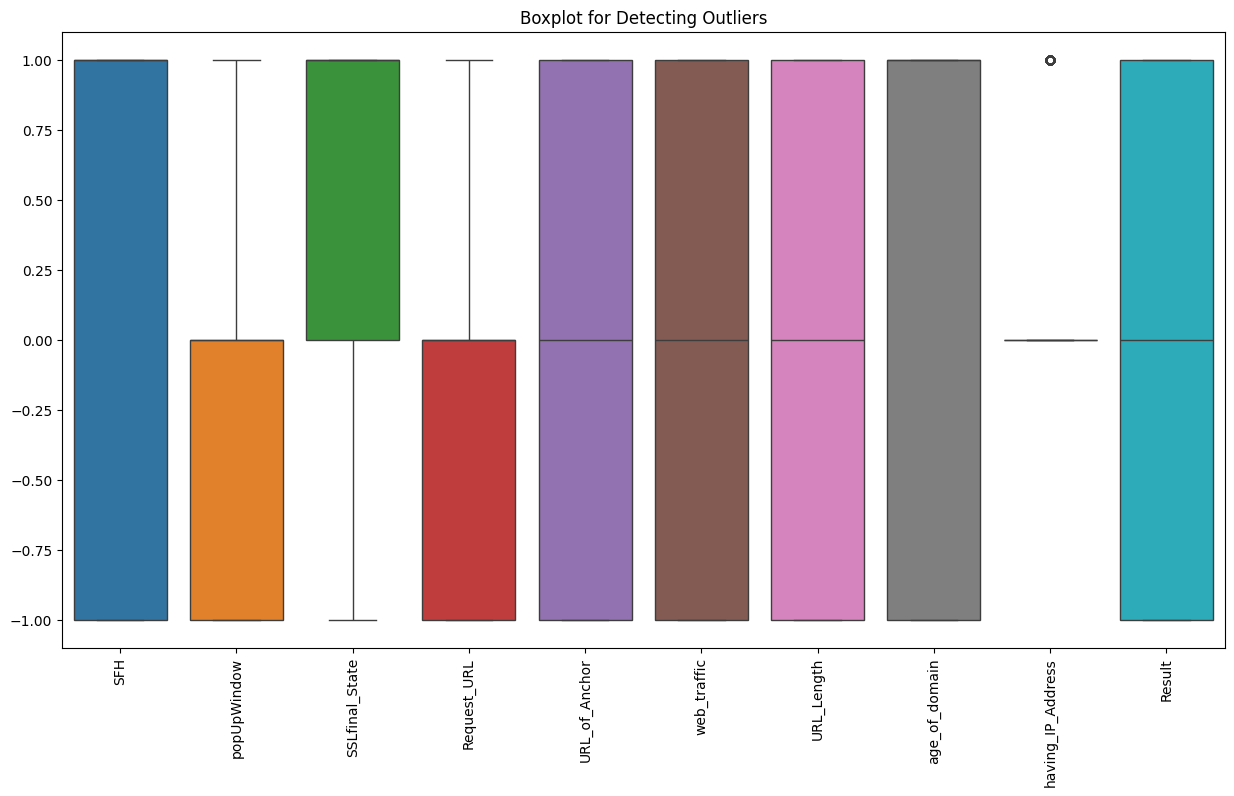

In [11]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Boxplot for Detecting Outliers")
plt.show()

In [12]:
# Define a function to identify outliers using IQR
def detect_outliers_iqr(df_cleaned, threshold=1.5):
    outliers = {}
    for column in df_cleaned.columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers[column] = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)][column]
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(df_cleaned)
print("\nOutliers detected in each column:")
for col, outlier_values in outliers.items():
    print(f"{col}: {len(outlier_values)} outliers")



Outliers detected in each column:
SFH: 0 outliers
popUpWindow: 0 outliers
SSLfinal_State: 0 outliers
Request_URL: 0 outliers
URL_of_Anchor: 0 outliers
web_traffic: 0 outliers
URL_Length: 0 outliers
age_of_domain: 0 outliers
having_IP_Address: 120 outliers
Result: 0 outliers


In [14]:
# Cap outliers at the lower and upper bounds
for col in df_cleaned.columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned.loc[df_cleaned[col] < lower_bound, col] = lower_bound
    df_cleaned.loc[df_cleaned[col] > upper_bound, col] = upper_bound


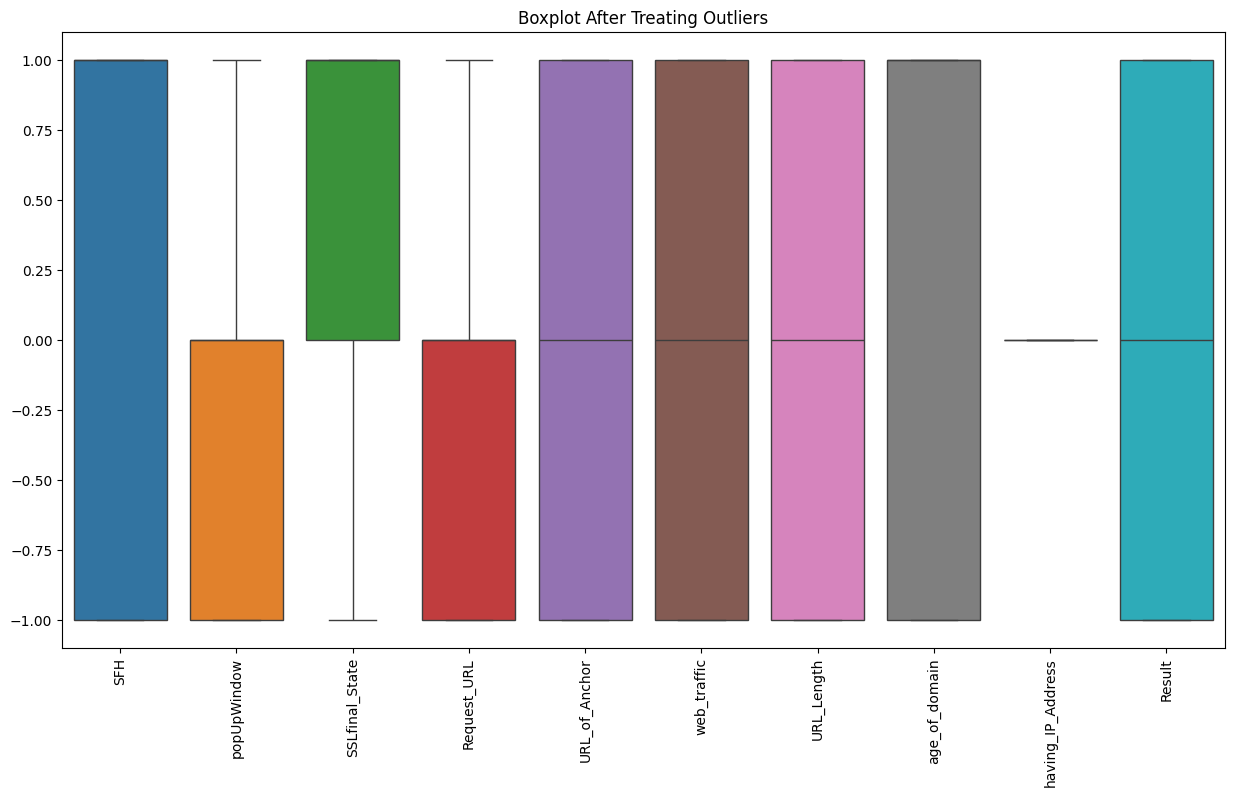

In [15]:
# Boxplot to confirm outliers have been treated
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Boxplot After Treating Outliers")
plt.show()

In [16]:
print("Dataset values range:")
for column in df_cleaned.columns:
    unique_vals = df_cleaned[column].unique()
    print(f"{column}: {unique_vals}")

Dataset values range:
SFH: [ 1 -1  0]
popUpWindow: [-1.  0.  1.]
SSLfinal_State: [ 1. -1.  0.]
Request_URL: [-1.  0.  1.]
URL_of_Anchor: [-1  0  1]
web_traffic: [ 1  0 -1]
URL_Length: [ 1 -1  0]
age_of_domain: [ 1 -1]
having_IP_Address: [0]
Result: [ 0  1 -1]


# EDA

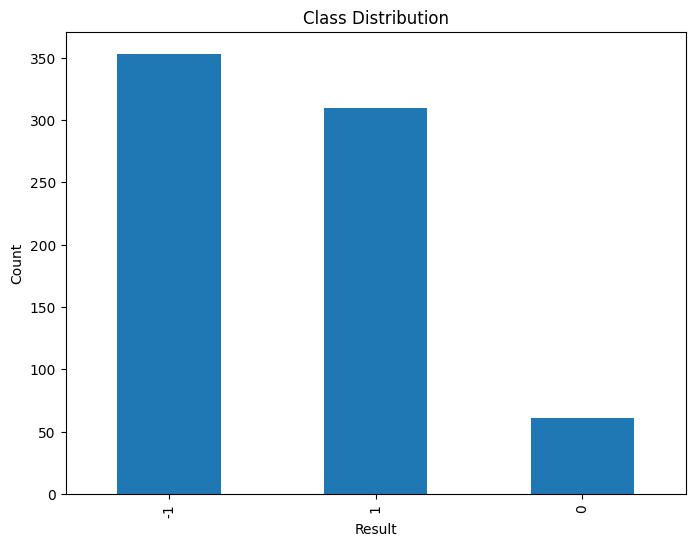

In [17]:
plt.figure(figsize=(8, 6))
df_cleaned['Result'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [18]:
print("Class Distribution:")
print(df_cleaned['Result'].value_counts())
print(f"Class Distribution Percentage:\n{df['Result'].value_counts(normalize=True) * 100}")

Class Distribution:
Result
-1    353
 1    310
 0     61
Name: count, dtype: int64
Class Distribution Percentage:
Result
-1    51.884701
 1    40.502587
 0     7.612712
Name: proportion, dtype: float64


## Feature Engineering

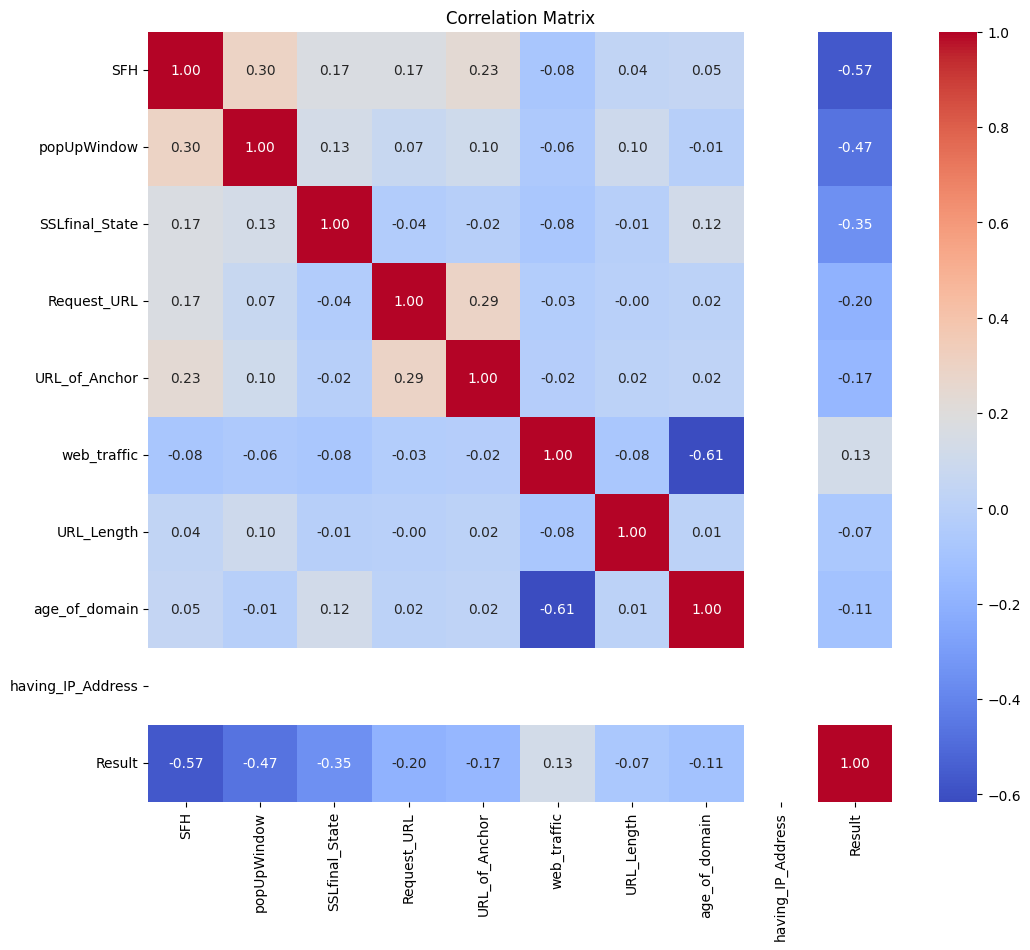

In [19]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [20]:
print("\nCorrelation with target variable:")
print(correlation_matrix['Result'].sort_values(ascending=False))


Correlation with target variable:
Result               1.000000
web_traffic          0.127905
URL_Length          -0.071532
age_of_domain       -0.107963
URL_of_Anchor       -0.173371
Request_URL         -0.195046
SSLfinal_State      -0.354768
popUpWindow         -0.465372
SFH                 -0.566644
having_IP_Address         NaN
Name: Result, dtype: float64


## Data Preprocessing

In [21]:
# Separate features and target
X = df_cleaned.drop('Result', axis=1)
y = df_cleaned['Result']

In [22]:
# Check for class imbalance
class_counts = y.value_counts()
print("Class distribution:")
print(class_counts)

Class distribution:
Result
-1    353
 1    310
 0     61
Name: count, dtype: int64


In [23]:
# If there is class imbalance, we might want to handle it
if len(class_counts) > 1 and class_counts.min() / class_counts.max() < 0.5:
    print("Class imbalance detected. Using class weights in the model.")
    class_weight = 'balanced'
else:
    class_weight = None

Class imbalance detected. Using class weights in the model.


## Data Splitting

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 506 samples
Validation set size: 109 samples
Test set size: 109 samples


In [25]:
from collections import Counter

print("Original class distribution in training set:")
print(Counter(y_train))


Original class distribution in training set:
Counter({-1: 247, 1: 217, 0: 42})


In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [27]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:")
print(Counter(y_smote))

Class distribution after SMOTE:
Counter({-1: 247, 0: 247, 1: 247})


In [28]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print("Class distribution after random undersampling:")
print(Counter(y_rus))

Class distribution after random undersampling:
Counter({-1: 42, 0: 42, 1: 42})


## Model Training


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight=class_weight))
])

In [30]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}


In [31]:
from sklearn.model_selection import GridSearchCV

# Grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [32]:
print("Training the model with grid search and cross-validation for smote...")
grid_search.fit(X_smote, y_smote)

Training the model with grid search and cross-validation for smote...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [33]:
print(f"Best parameters: {grid_search.best_params_}")

print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best cross-validation score: 0.8759


In [34]:
from sklearn.metrics import  accuracy_score

best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy:.4f}")

Validation accuracy: 0.8073


In [35]:
# Evaluate on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.7982


In [36]:
from sklearn.metrics import classification_report

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.79      0.82        53
           0       1.00      0.40      0.57        10
           1       0.75      0.89      0.81        46

    accuracy                           0.80       109
   macro avg       0.86      0.69      0.73       109
weighted avg       0.81      0.80      0.79       109



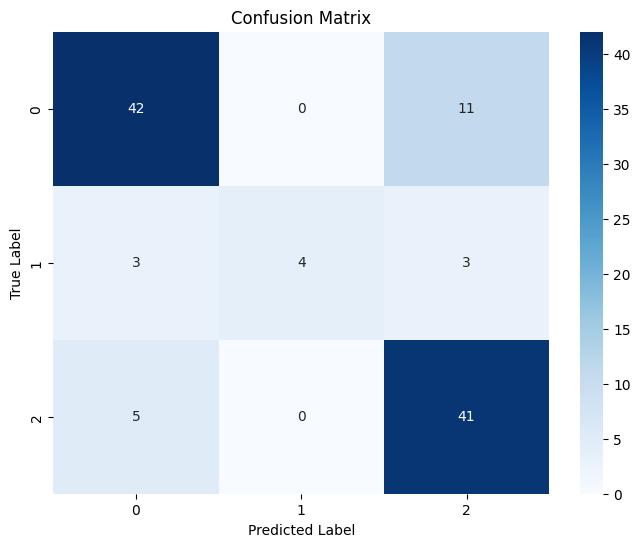

In [37]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
print("Training the model with grid search and cross-validation for random undersampling...")
grid_search.fit(X_rus, y_rus)

Training the model with grid search and cross-validation for random undersampling...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [40]:
print(f"Best parameters: {grid_search.best_params_}")

print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation score: 0.6991


In [41]:
from sklearn.metrics import  accuracy_score

best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy:.4f}")

Validation accuracy: 0.7798


In [42]:
# Evaluate on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.7706


In [43]:
from sklearn.metrics import classification_report

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.68      0.79        53
           0       0.53      0.80      0.64        10
           1       0.71      0.87      0.78        46

    accuracy                           0.77       109
   macro avg       0.73      0.78      0.74       109
weighted avg       0.81      0.77      0.77       109



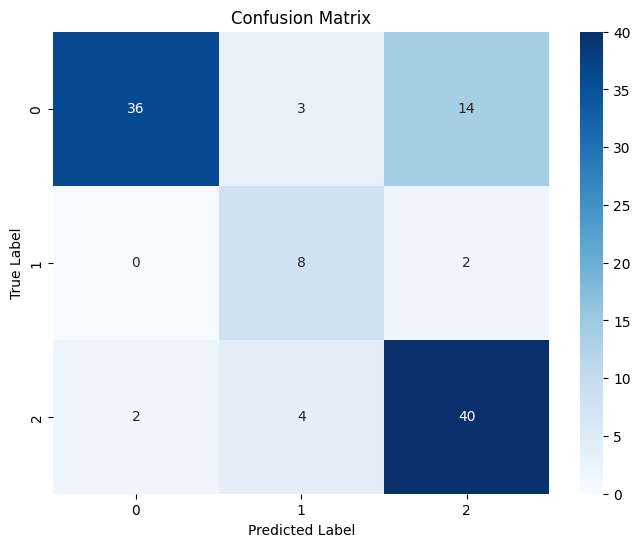

In [44]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()